## Step 1 - Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2 - Load Data and Visualization

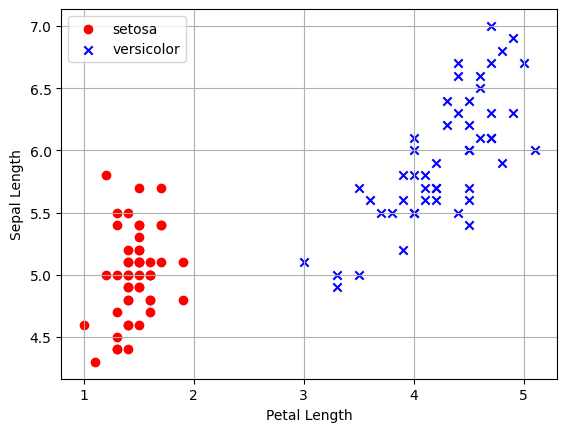

In [4]:
df = pd.read_csv("iris.csv")

setosa = df[df["species"] == "setosa"]
versicolor = df[df["species"] == "versicolor"]
virginica = df[df["species"] == "virginica"]

a, b = "petal length (cm)", "sepal length (cm)"
plt.scatter(setosa[a], setosa[b], color="red", marker="o", label="setosa")
plt.scatter(versicolor[a], versicolor[b], color="blue", marker="x", label="versicolor")

plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.legend(loc="upper left")
plt.grid()
plt.show()


## Step 3 - Make the Percepton Class

In [5]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Step 4 - Choosing Data and Encoding Label

In [6]:
y = df.iloc[0:100, 4].values  # pilih 100 data awal
y = np.where(y == "Iris-setosa", -1, 1)  # ganti coding label
X = df.iloc[0:100, [0, 3]].values  # slice data latih

## Step 5 - Fitting Model

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

## Step 6 - Visualization on each Epoch

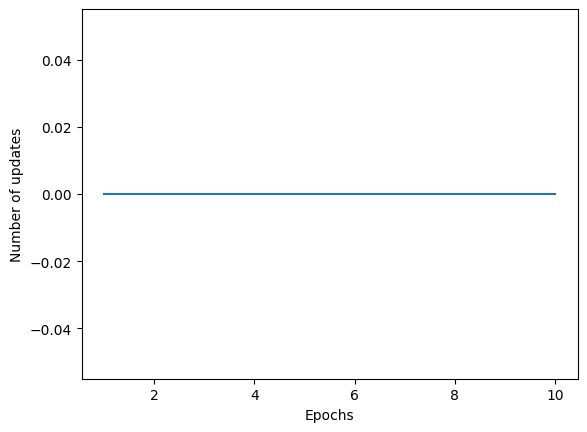

In [8]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## Step 7 - Decision Boundary Visualization

/var/folders/6q/cnww_j8x5_dbvqz5j1cxrlr80000gn/T/ipykernel_93029/3774966645.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


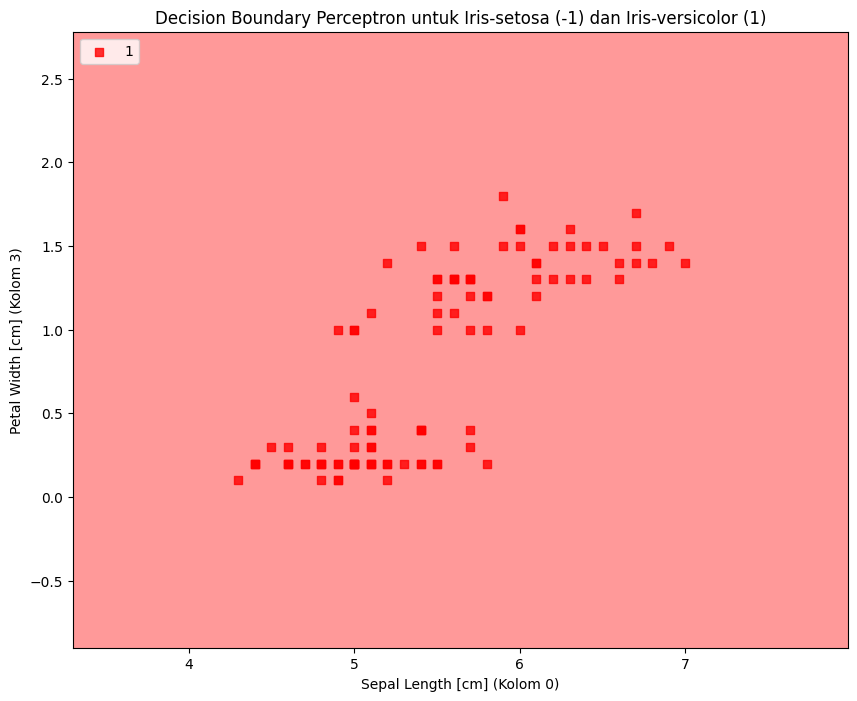

In [9]:
# create a function to plot the decision regions

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ("s", "x", "o", "^", "v")
    colors = ("r", "b", "g", "k", "grey")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)
    )

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=cmap(i),
            marker=markers[i],
            label=cl,
        )


plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel("Sepal Length [cm] (Kolom 0)")
plt.ylabel("Petal Width [cm] (Kolom 3)")
plt.title("Decision Boundary Perceptron untuk Iris-setosa (-1) dan Iris-versicolor (1)")
plt.legend(loc="upper left")
plt.show()
